In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='Gill Sans MT')

In [2]:
cd Documents/github/housing_stats/

[WinError 3] The system cannot find the path specified: 'Documents/github/housing_stats/'
C:\Users\mmak\Documents\GitHub\housing_stats


In [3]:
cal_high = pd.read_csv('data//pop//2019-2046-07-census-divisions-population-projections-high.csv')
cal_med = pd.read_csv('data//pop/2019-2046-07-census-divisions-population-projections-medium.csv')
cal_low = pd.read_csv('data//pop//2019-2046-05-census-divisions-population-projections-low.csv')

C:\Users\mmak\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
al_high = cal_high[cal_high['Region']=='Alberta']
al_med = cal_med[cal_med['Region']=='Alberta']
al_low = cal_low[cal_low['Region']=='Alberta']

In [5]:
cal_high = cal_high[cal_high['Region']=='6']
cal_med = cal_med[cal_med['Region']=='6']
cal_low = cal_low[cal_low['Region']=='6']

cal_high.index = cal_high['Year']
cal_med.index = cal_med['Year']
cal_low.index = cal_low['Year']


In [6]:
# sex == 3 <- male + female 
cal_high_all=cal_high[((cal_high['Age']=='Total') & (cal_high['Sex']==3))]

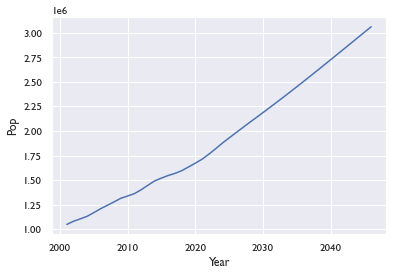

In [7]:
sns.lineplot(x=cal_high_all.Year,y=cal_high_all.Pop)

In [8]:
cal_med_all = cal_med[((cal_med['Age']=='Total') & (cal_med['Sex']==3))]
cal_low_all = cal_low[((cal_low['Age']=='Total') & (cal_low['Sex']==3))]

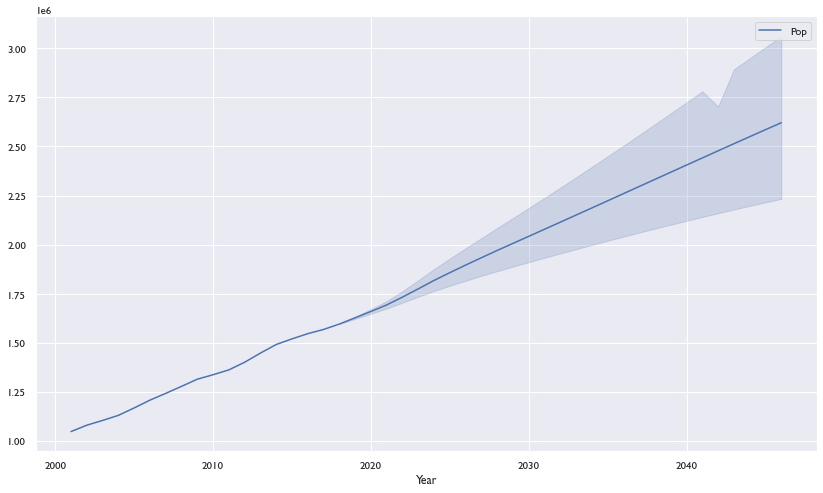

In [9]:
fig, ax = plt.subplots(figsize=(14,8))
cal_all = pd.DataFrame([cal_high_all.loc[:'2018','Pop'],
                        cal_high_all.loc['2018':,'Pop'],
                        cal_med_all.loc['2018':,'Pop'],
                        cal_low_all.loc['2018':,'Pop'], 
                        ])
cal_all=cal_all.T
sns.lineplot(data = cal_all,ax=ax)

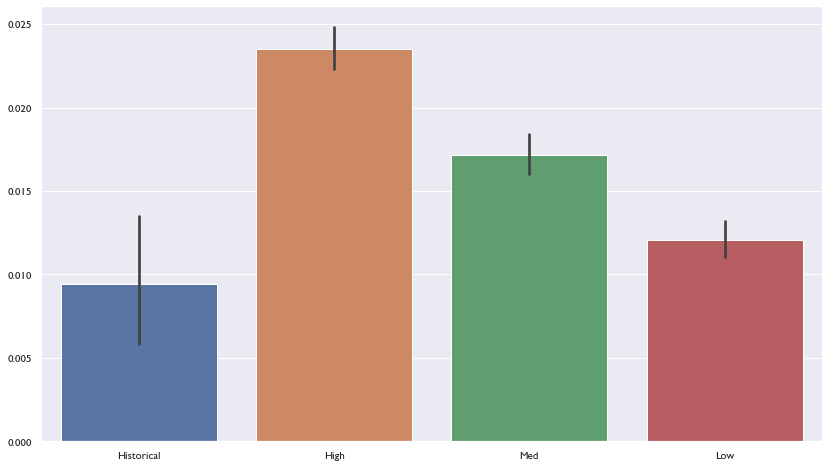

In [10]:
fig, ax2 = plt.subplots(figsize=(14,8))

cal_pct = cal_all.pct_change()
cal_pct.columns=['Historical','High','Med','Low']
sns.barplot(data=cal_pct)

In [11]:
cal_pct['Year']= cal_pct.index

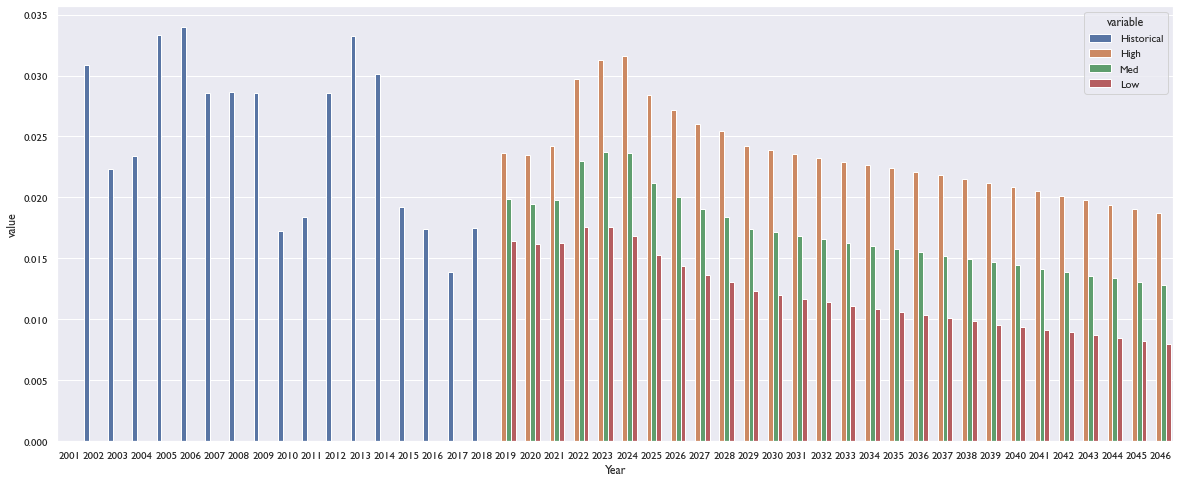

In [12]:
fig, ax2 = plt.subplots(figsize=(20,8))

sns.barplot(data=pd.melt(cal_pct, id_vars=['Year']),hue='variable',x='Year',y='value')

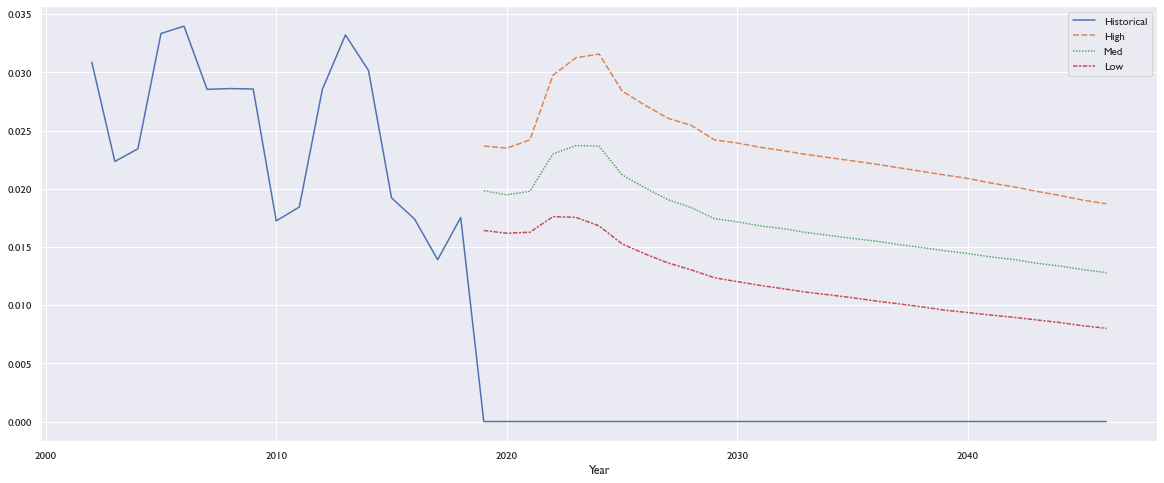

In [16]:
fig, ax3 = plt.subplots(figsize=(20,8))

sns.lineplot(data = cal_pct.drop('Year',axis=1),ax=ax3)

In [17]:
cal_med_sample = cal_med[cal_med['Age']!='Total']
cal_data = cal_med_sample[cal_med_sample['Sex']!=3]
cal_data['Year']

Year
2001    2001
2001    2001
2001    2001
2001    2001
2001    2001
        ... 
2046    2046
2046    2046
2046    2046
2046    2046
2046    2046
Name: Year, Length: 8372, dtype: int64

In [20]:
%matplotlib inline


C:\Users\mmak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


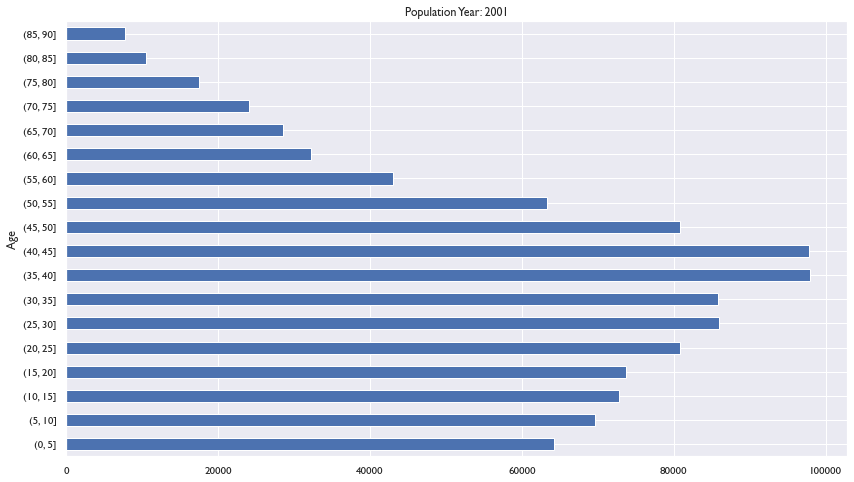

In [21]:
import matplotlib.animation as animation
fig, ax4 = plt.subplots(figsize=(14,8))


def animate(i):
    data = cal_data[cal_data['Year']==int(i)+2001]
    data.replace(to_replace='90+', value=90,inplace=True)
    data=data.astype({'Age':'int32'})
    bins =pd.cut(data['Age'],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
    data.groupby(bins)['Pop'].sum().plot(kind='barh', title = 'Population Year: ' + str(i+2001))

ani = animation.FuncAnimation(fig,animate,frames=20,interval=5,repeat=True)

In [84]:
data.replace(to_replace='90+', value=90,inplace=True)
data.astype({'Age':'int32'}).dtypes

Year       int64
Region    object
Sex        int64
Age        int32
Pop        int64
dtype: object

In [94]:
data=data.astype({'Age':'int32'})

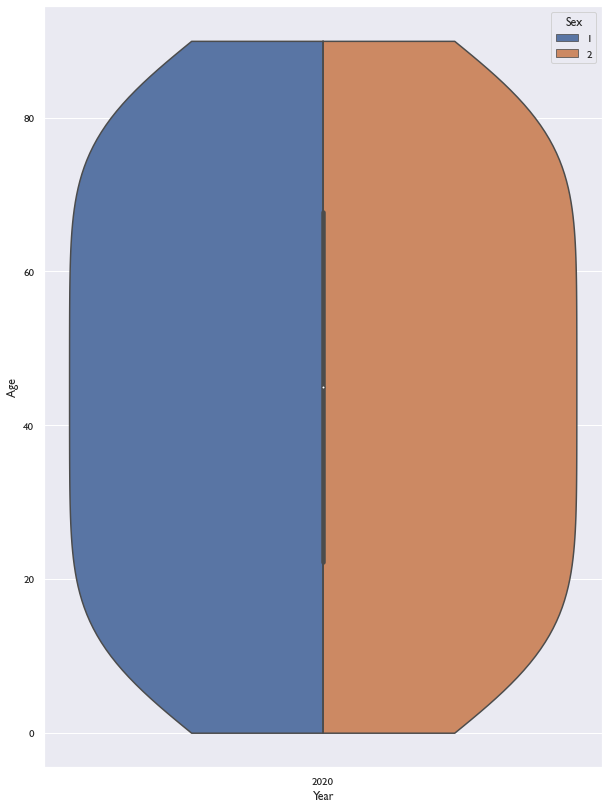

In [102]:
fig, ax4 = plt.subplots(figsize=(10,14))
data = cal_data[cal_data['Year']==2020]
data.replace(to_replace='90+', value=90,inplace=True)
data=data.astype({'Age':'int32'})
sns.violinplot(x='Year',y='Age', hue = 'Sex', split=True,data=data, ax=ax4, bw='scott', cut=0)

In [115]:
bins =pd.cut(data['Age'],[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])

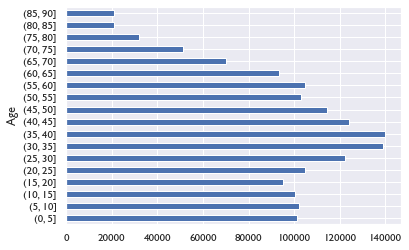

In [125]:
data.groupby(bins)['Pop'].sum().plot(kind='barh')

In [124]:
data

,Year,Region,Sex,Age,Pop
Year,,,,,
2020,2020,6,1,0,10515
2020,2020,6,1,1,10525
2020,2020,6,1,2,10350
2020,2020,6,1,3,10360
2020,2020,6,1,4,10515
...,...,...,...,...,...
2020,2020,6,2,86,1835
2020,2020,6,2,87,1705
2020,2020,6,2,88,1570
